In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
style.context('dark_background')

In [2]:


def VisualizeMeSenpai(filter_, num_of_movies=5, top_num=10):
    '''
    This will create a visualization using preset styling based on microsoft colors
    valid filter_ choices are currently: 
    actor, actress, composer, writer, director
    
    num_of movies: minimum number of works that have been attributed to displayed talent
    
    top_num: dictates how many talents will be displayed in the graph output
    '''
    MIC_OR = '#F25022'
    MIC_GR = '#7FBA00'
    MIC_BL = '#00A4EF'
    MIC_YL = '#FFB900'
    MIC_GY = '#737373'

    microsoft_color_list = [MIC_OR, MIC_GR, MIC_BL, MIC_YL, MIC_GY]

    df = pd.read_csv('../data/all_data.csv', index_col=0)

    col_dict = {'movie_id': 'Id', 
                'primary_title': 'MovieTitle',
                'persons_name': 'PersonName',
                'persons_job': 'PersonJob',
                'new_budget_api': 'Budget', 
                'new_ww_revenue_api': 'Revenue'}

    relevant_col = list(col_dict.keys())

    people_df = df[relevant_col].drop_duplicates()
    people_df.rename(columns=col_dict, inplace=True)

    job_filter = people_df['PersonJob'] == filter_

    job_df = people_df[job_filter]
    job_count_df = job_df.groupby('PersonName').count().reset_index()

    prolific_filter = job_count_df['Id'] >= num_of_movies

    prolific_df = job_count_df[prolific_filter]
    prolific_df.sort_values('Id', ascending=False).head()

    job_usefulness_df = job_df.groupby('PersonName').mean().reset_index()
    job_usefulness_df.sort_values('Revenue', ascending=False).head(30)

    prolific_list = list(prolific_df.PersonName)
    plot_df = job_usefulness_df.loc[job_usefulness_df.PersonName.isin(prolific_list)]
    plot_df = plot_df.nlargest(top_num,'Revenue')
    
    ax = sns.barplot(data=plot_df, 
                     y='PersonName',
                     x='Revenue', 
                     orient='h',
                     color='#00A4EF');
                     # color=np.random.choice(microsoft_color_list));
        
    # This changes the tick labels to show in millions (ex. 50,000,000 -> 50) 
    x_tick_labels = ['{:,.0f}'.format(x) for x in ax.get_xticks()/100000000]
    ax.set_xticks(ax.get_xticks().tolist())
    ax.set_xticklabels(x_tick_labels);
    
    ax.set(xlabel='Revenue (in 100 Millions)', ylabel=filter_.title(), title=f'Average Revenue Per Movie, by {filter_.title()}')


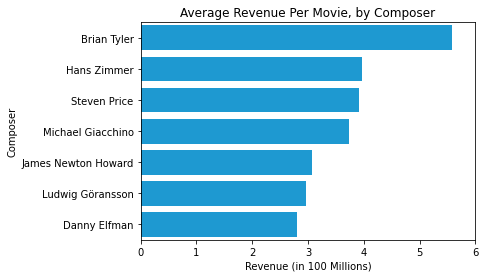

In [3]:
VisualizeMeSenpai('composer', 5, 7)

In [4]:
def FindMeSenpai(person, job_filter=0):
    '''
    this function finds a single talent from the IMBD data provided
    
    person: name of talent as a str
    job_filter: job title as a str,
        if this argument is not added, it will print a list of all of 
            the person's roles
        we currently support these choices for job_filter:
            actor, actress, composer, writer, director,
    '''

    relevant_col = ['original_title', 'persons_name', 'persons_job']
    job_list = ['actor', 'actress', 'composer', 'director', 'producer', 'writer']
    
    df = pd.read_csv('../data/movie_info_budget.csv', index_col=0) 
    df1 = df[relevant_col]

    df2 = df1.groupby(['persons_name', 'persons_job']).count().unstack().fillna(0)
    df2['total_roles'] = df2.sum(axis=1)
    try:
        if type(job_filter) == int:
            return df2.loc[person]
        else:
            return df2.loc[person][job_list.index(job_filter)]
    except KeyError:
        print(f"Looks like {person} isn't in our database.")
    

In [5]:
FindMeSenpai('David Julyan')

Looks like David Julyan isn't in our database.
